In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
#checking columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking null
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

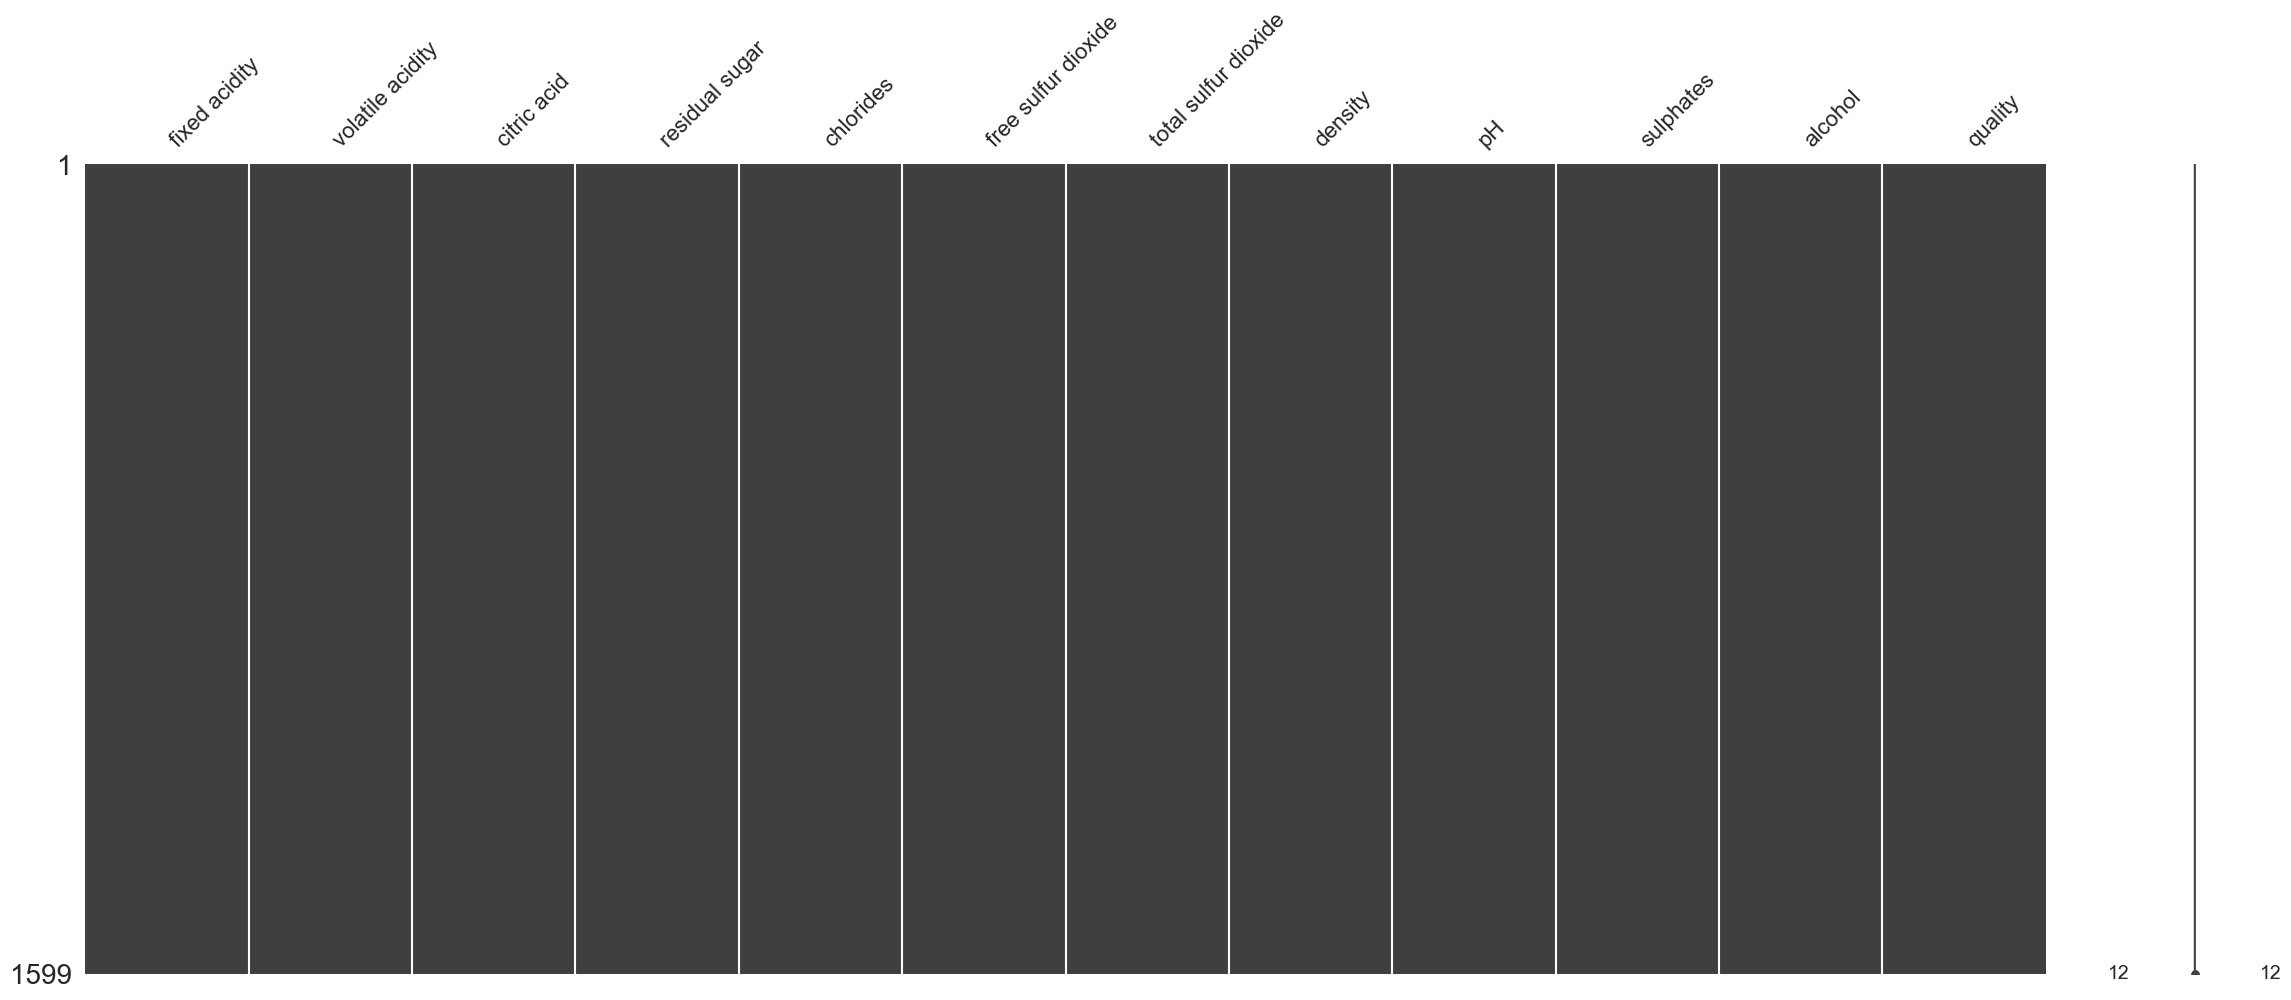

In [7]:
msno.matrix(df) 

# UNIVARIATE ANALYSIS.

In [8]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


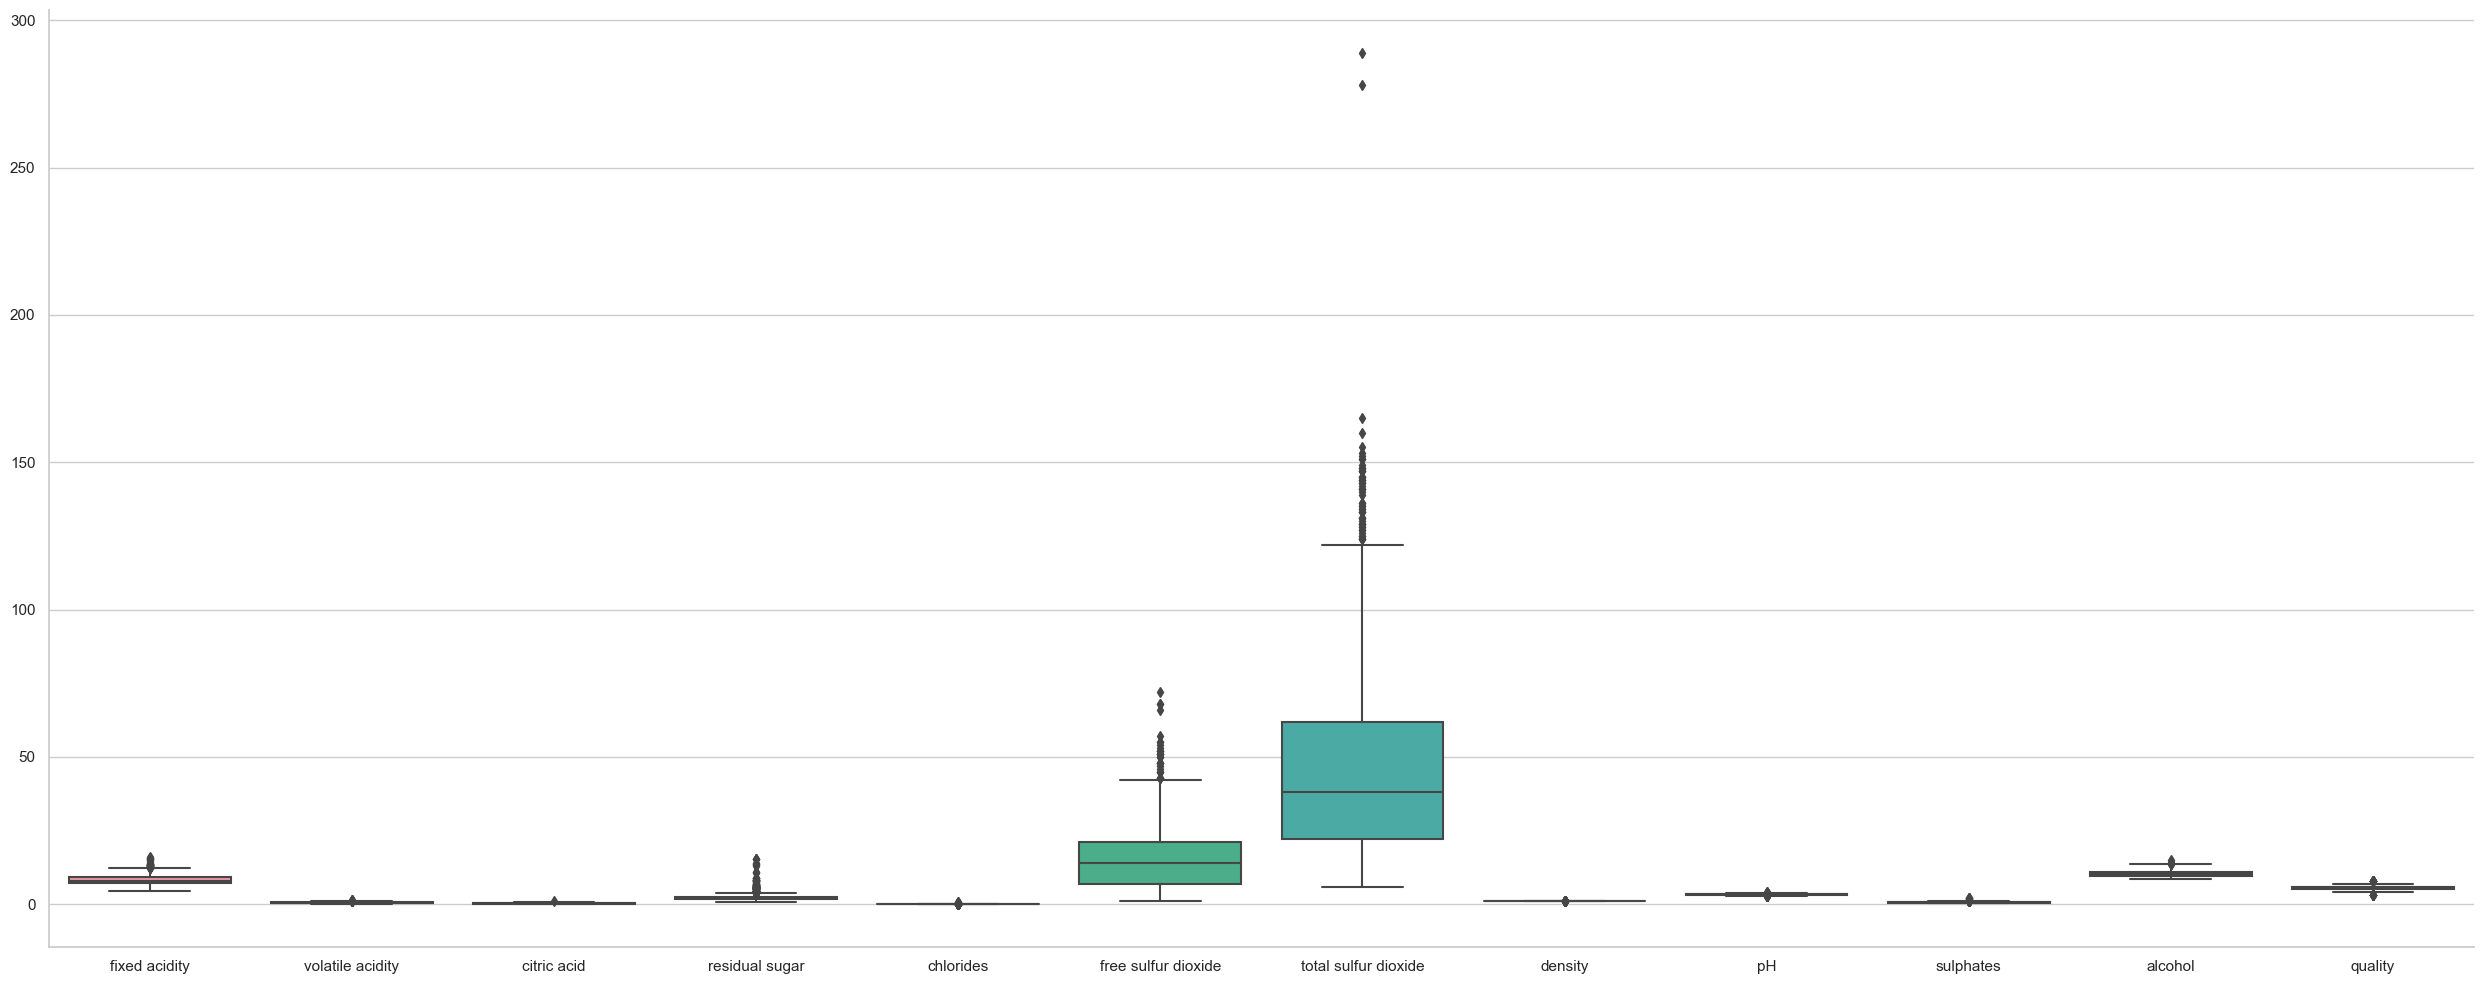

In [9]:
#fixed acidity.
sns.catplot(data=df,kind='box',height=10,aspect=2.5)

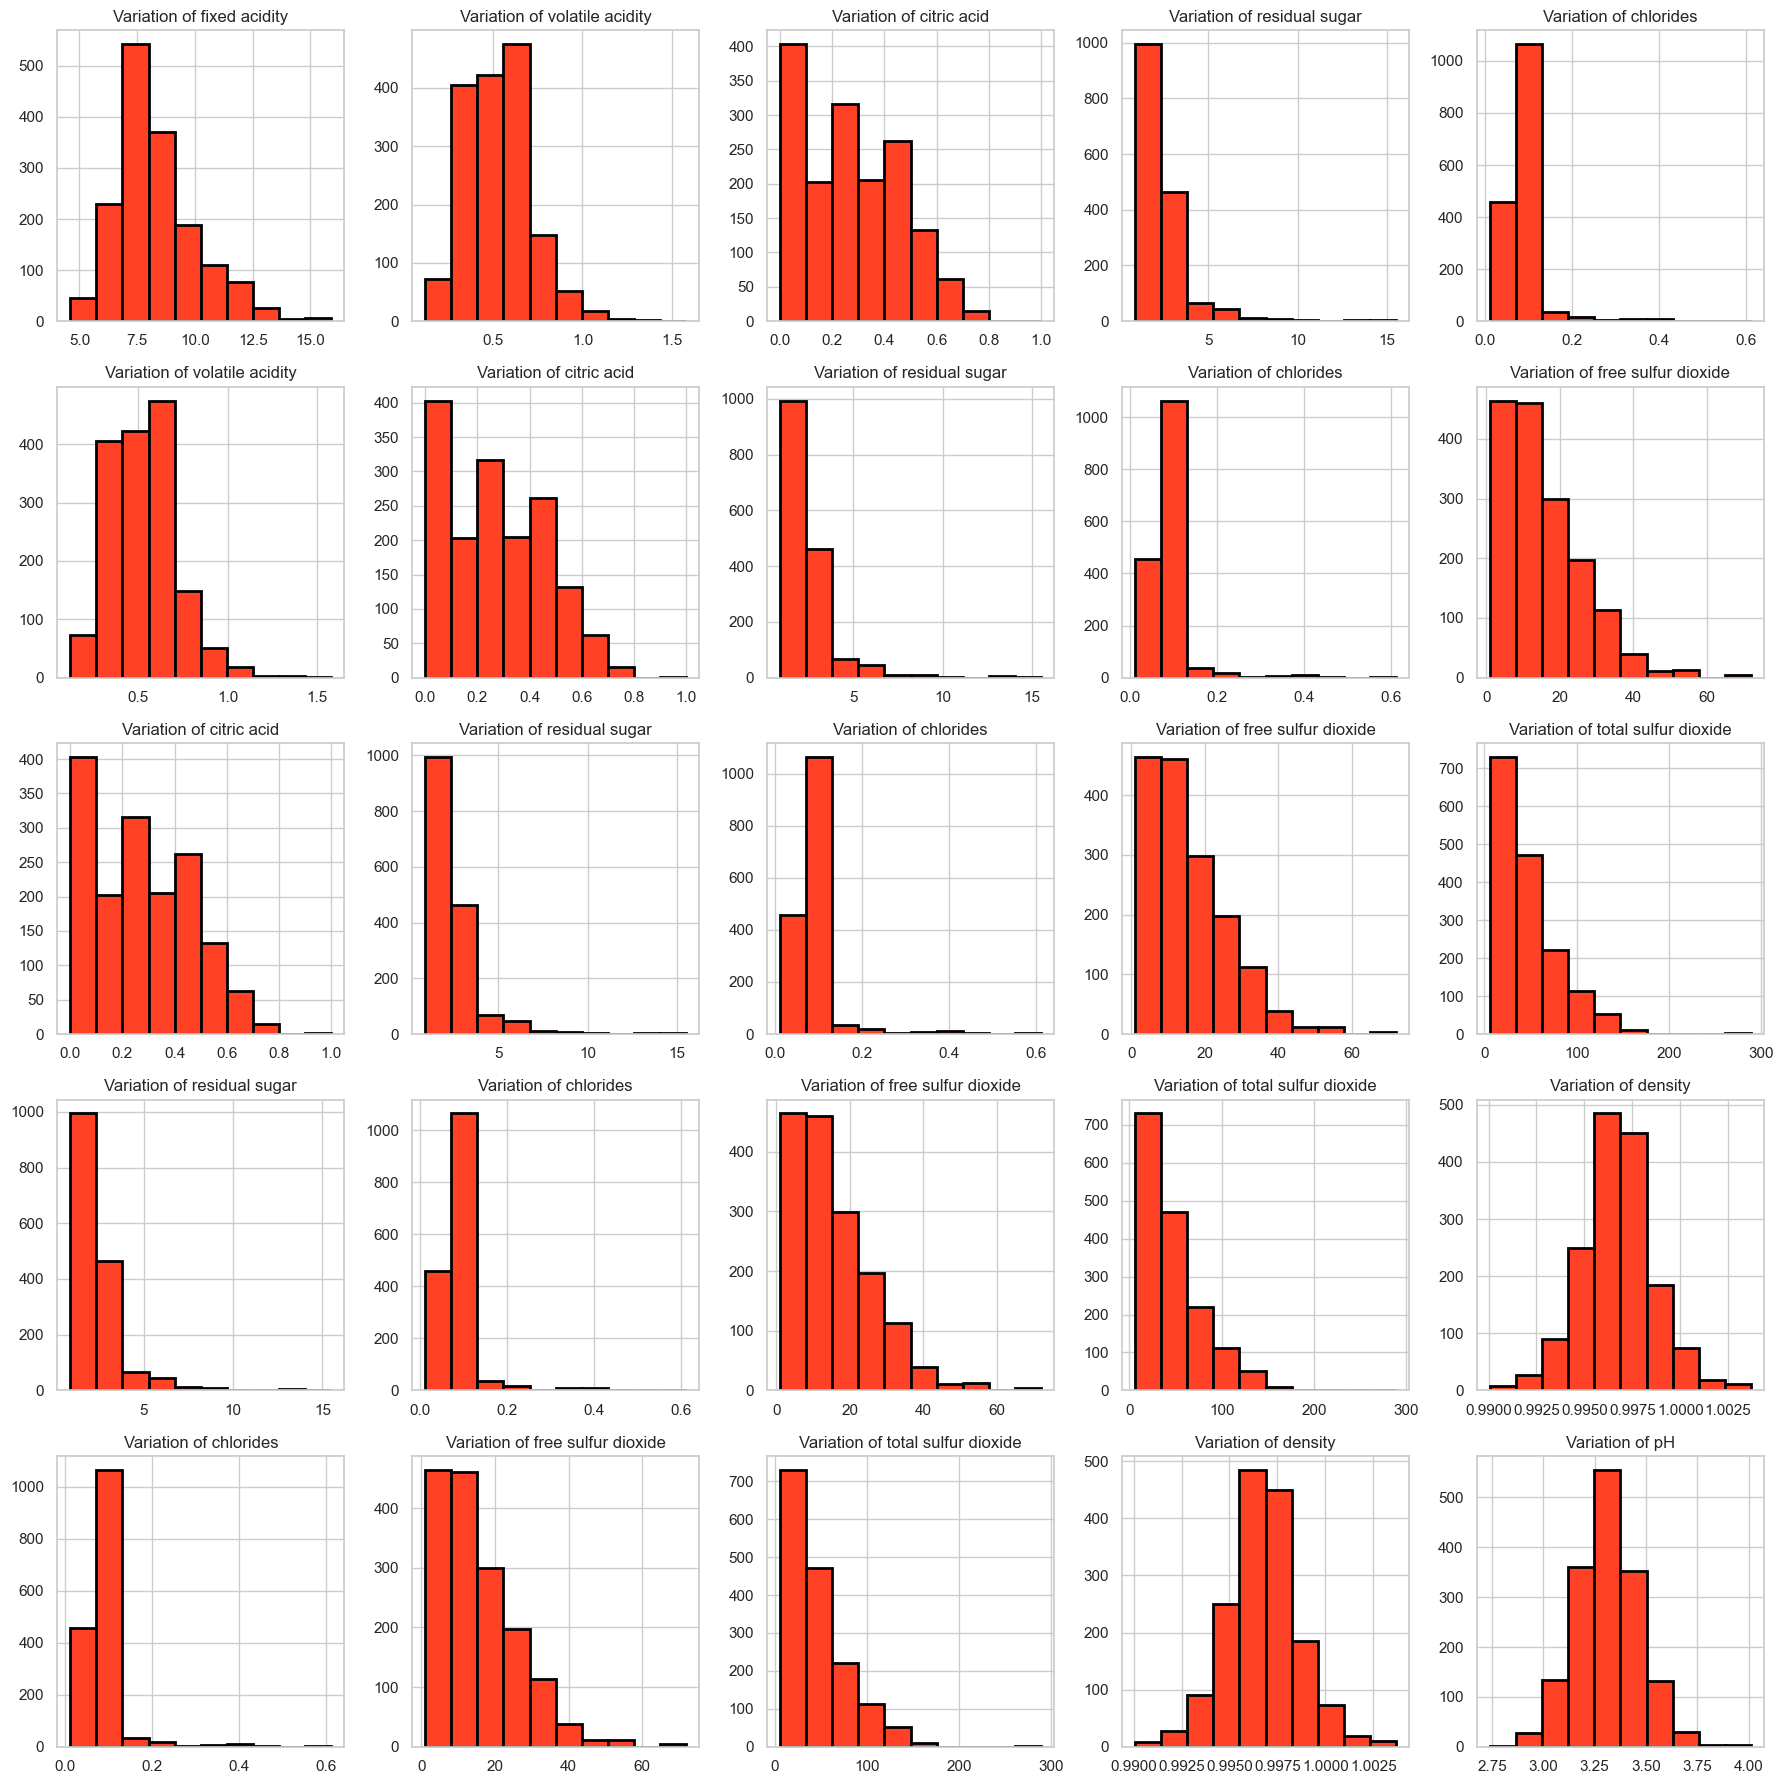

In [10]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()


### CORELATION BETWEEN DIFFERENT FEATURES

<Axes: >

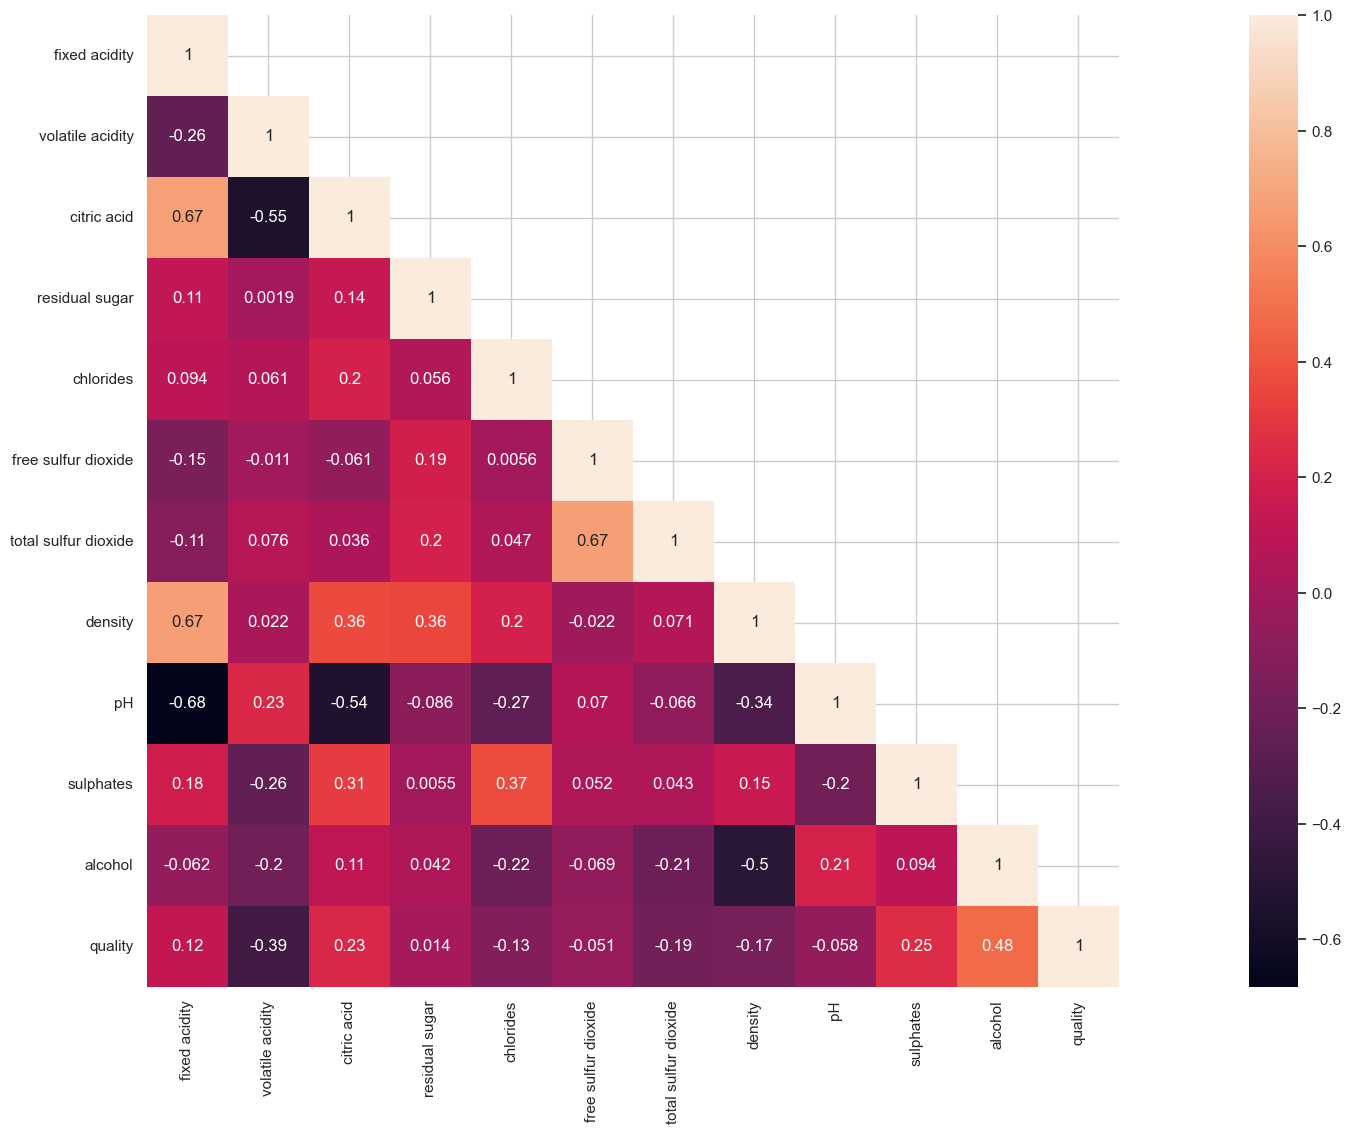

In [11]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

1. The quality of wine is highly related to volatile acidity.

2. Also the quality of wine is highly corelated to alcohol.

3. pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

4. Self Relation ie of a fetaure to itself is 1 as expected.

5.  some other similar inferences can be drawn.

# HOW QUALITY VARIES WITH DIFFERENT NUMERIC FEATURES.

In [12]:
def plot(feature_x,target='quality'):
    sns.catplot(x=target,y=feature_x,data=df,kind='bar',height=5,aspect=1)
    sns.catplot(x=target,y=feature_x,data=df,kind='violin',height=5,aspect=1)
    sns.catplot(x=target,y=feature_x,data=df,kind='swarm',height=5,aspect=1)
    

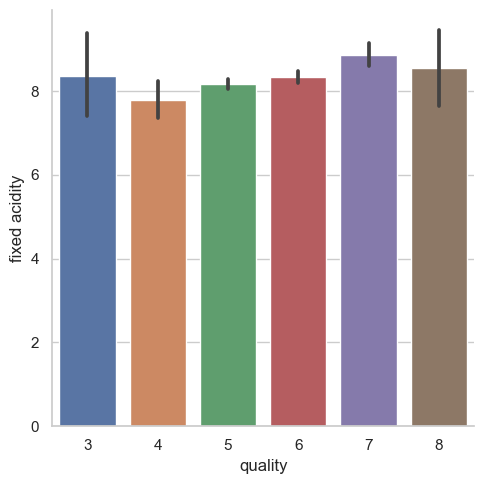

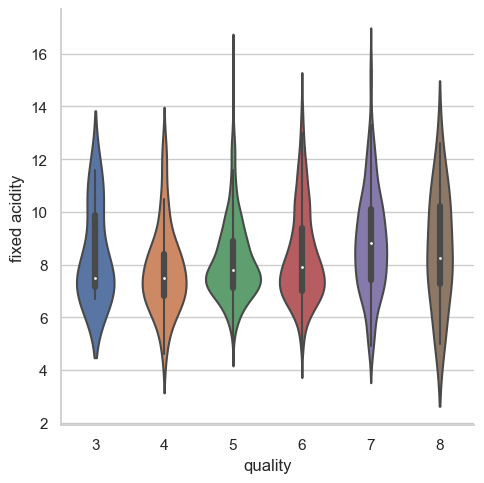

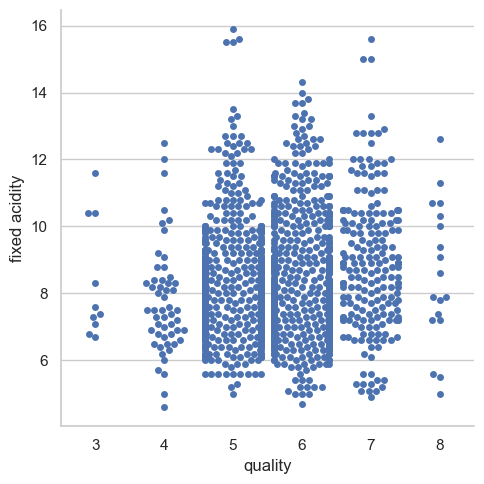

In [13]:
# for fixed acidity.
plot('fixed acidity','quality')

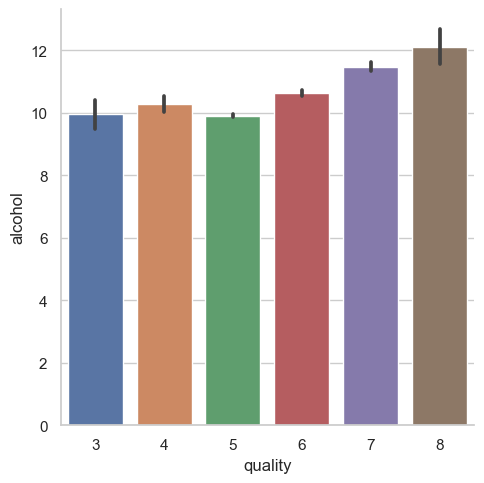

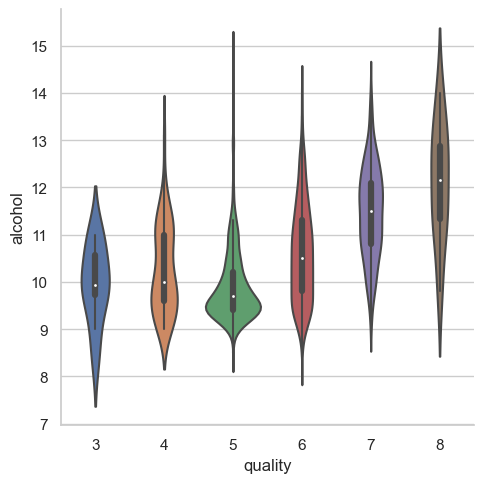

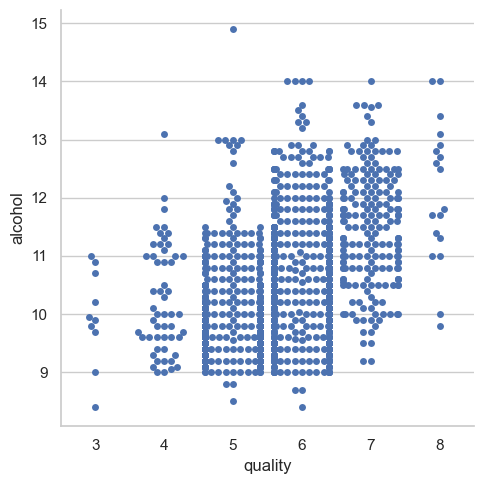

In [14]:
# for alcohol.
plot('alcohol','quality')

In [15]:
# similarly we can check for other variables.

### MODELLING 

In [16]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [17]:
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [20]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.875, 0.875, 0.87, 0.8625, 0.91, 0.895, 0.8775, 0.8525]}

In [21]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.8750
1,LinearSVM,0.8750
2,rbfSVM,0.8700
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9100
5,DecisionTree,0.8950
6,GradientBoostingClassifier,0.8775
7,GaussianNB,0.8525


<Axes: xlabel='Accuracy', ylabel='Modelling Algo'>

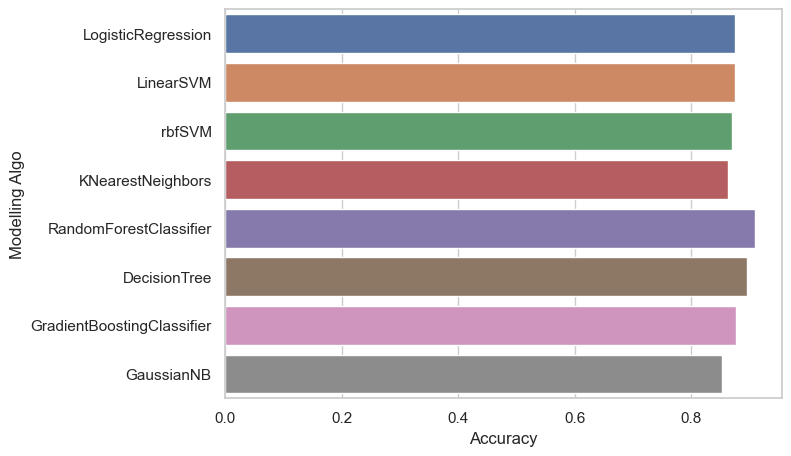

In [22]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

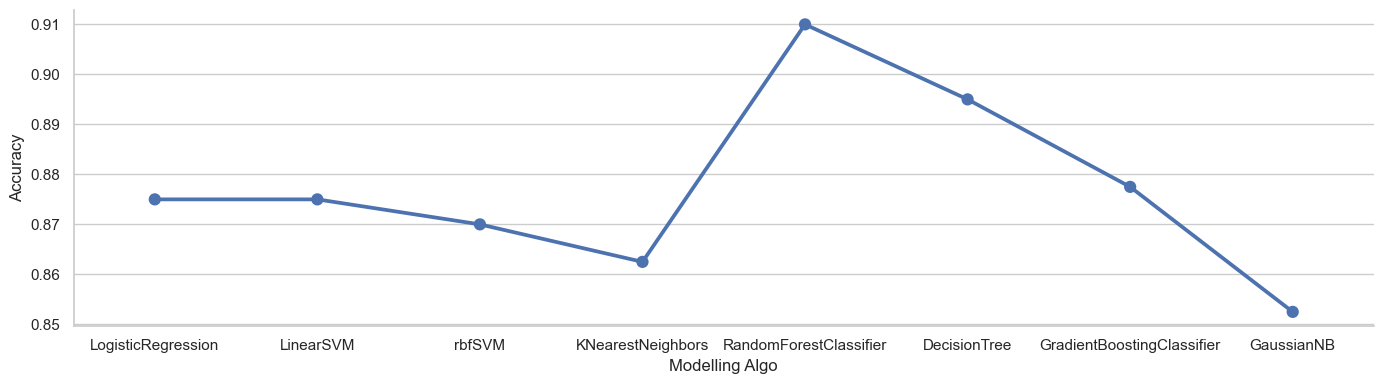

In [23]:
sns.catplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',height=4,aspect=3.5)

### THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [24]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)
    

In [25]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].to_numpy()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])
    
    

In [26]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.8750,0.8800,0.8775
1,LinearSVM,0.8750,0.8825,0.8825
2,rbfSVM,0.8700,0.8850,0.8900
3,KNearestNeighbors,0.8625,0.8850,0.8950
4,RandomForestClassifier,0.9100,0.9100,0.9025
5,DecisionTree,0.8950,0.8925,0.8925
6,GradientBoostingClassifier,0.8775,0.8750,0.8775
7,GaussianNB,0.8525,0.8425,0.8425


1. Note that here the accuracies increase marginally on scaling.

2. Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.

3. For some modelling algos there is a considerable increase in accuracies upon scaling the features like SVM, KNN wheras for others there isn't a considerable increase in accuracies upon scaling.

<Axes: xlabel='Accuracy', ylabel='Modelling Algo'>

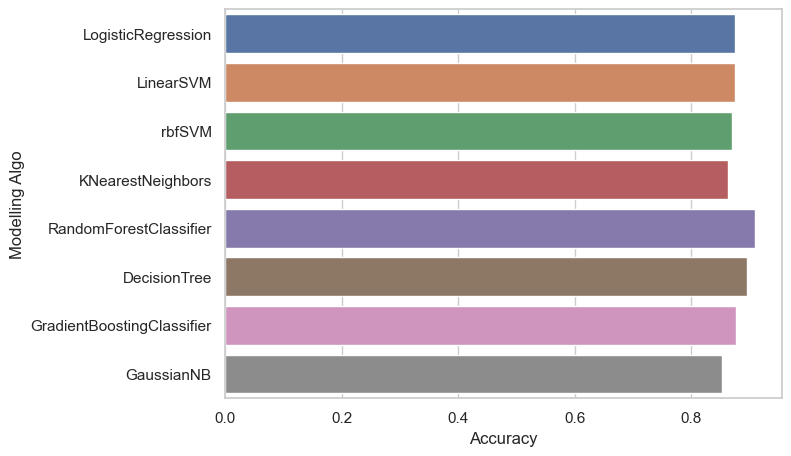

In [27]:
# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<Axes: xlabel='Acc_Min_Max_Scaler', ylabel='Modelling Algo'>

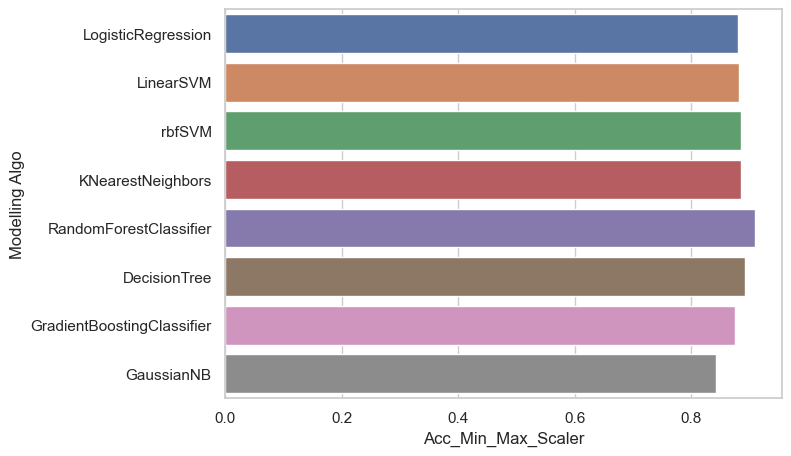

In [28]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

<Axes: xlabel='Acc_Standard_Scaler', ylabel='Modelling Algo'>

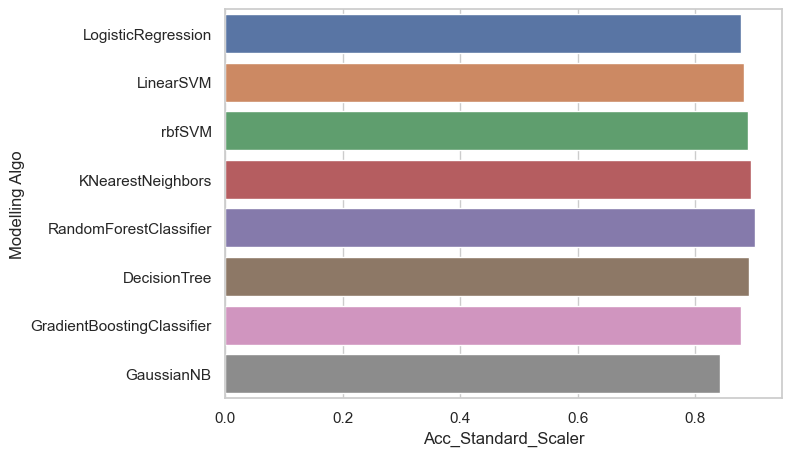

In [29]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [30]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#  PARAMETER TUNING

###### 1.   LOGISTIC REGRESSION.

In [31]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [32]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [33]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8815826330532213

In [34]:
clf_lr.cv_results_

{'mean_fit_time': array([0.00059965, 0.00360003, 0.00050023, 0.0028002 , 0.00059991,
        0.00410001, 0.00050004, 0.00499988, 0.0003    , 0.0052002 ,
        0.00040016, 0.00460021, 0.00040004, 0.00540028]),
 'std_fit_time': array([0.00048961, 0.0011136 , 0.00050023, 0.000872  , 0.00048982,
        0.00069991, 0.00050004, 0.00100031, 0.00045826, 0.00087161,
        0.0004901 , 0.00066332, 0.00048995, 0.00049019]),
 'mean_score_time': array([0.        , 0.00120029, 0.        , 0.00089977, 0.        ,
        0.00090034, 0.        , 0.00110044, 0.        , 0.00120037,
        0.        , 0.00090017, 0.        , 0.00110018]),
 'std_score_time': array([0.        , 0.00040002, 0.        , 0.00029992, 0.        ,
        0.00030011, 0.        , 0.00053851, 0.        , 0.00040016,
        0.        , 0.00030006, 0.        , 0.00029997]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000],
              mask=[False, Fal

In [35]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.8825

######   2. KNN.

In [36]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [37]:
clf_knn.best_score_

0.8807422969187675

In [38]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [39]:
clf_knn.cv_results_

{'mean_fit_time': array([0.00360007, 0.00329976, 0.00349979, 0.00329914, 0.00359979,
        0.00319986, 0.00340011, 0.00330005, 0.00349929, 0.0033998 ,
        0.00309944, 0.00329969, 0.00309961, 0.00339971, 0.00340002,
        0.00330007, 0.00339997, 0.00339983, 0.00339932, 0.00349951,
        0.00339944, 0.00359986, 0.00349982, 0.0030998 , 0.00349998,
        0.00329995, 0.00349941, 0.00309978, 0.00339997, 0.00359991,
        0.00450037, 0.00349987, 0.00369992, 0.00329986, 0.00359962,
        0.00349989, 0.00359962, 0.0033721 , 0.00369949, 0.00339975,
        0.0033    , 0.00339973, 0.00359983, 0.00329936, 0.00330002,
        0.00329981, 0.00349987, 0.00349989, 0.00339966, 0.0033999 ]),
 'std_fit_time': array([0.00066395, 0.00045854, 0.00049992, 0.00064052, 0.00180049,
        0.0004001 , 0.00048991, 0.00064069, 0.00067075, 0.0006635 ,
        0.00030001, 0.00045791, 0.00030027, 0.00049   , 0.00049023,
        0.00045839, 0.00066333, 0.00049019, 0.00048973, 0.00050049,
        0.000

In [40]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.89

###### 3. SUPPORT VECTOR MACHINE (SVM)

In [42]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
clf.best_score_

0.8999165971643036

In [44]:
clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [45]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
clf_svm.best_score_

0.9065888240200167

In [47]:
clf_svm.best_params_

{'C': 1.5, 'gamma': 0.9, 'kernel': 'rbf'}

In [48]:
clf_svm.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'linear'},
 mean: 0.89658, std: 0.01684, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01623, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'linear'},
 mean: 0.89741, std: 0.01587, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'linear'},
 mean: 0.89491, std: 0.01848, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'rbf'},
 mea

In [49]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.9175

#### HENCE TILL NOW THE BEST ACCURACY IS GIVEN BY SVM WITH rbf KERNEL WITH  C=1.5 and gamma=0.90 .

######   4. RANDOM FOREST.

In [41]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [42]:
clf_rf.best_score_

0.9107843137254902

In [43]:
clf_rf.best_params_

{'max_features': 'log2', 'n_estimators': 500}

In [44]:
clf_rf.cv_results_

{'mean_fit_time': array([3.99804115e-04, 1.12589784e+00, 1.16392264e+00]),
 'std_fit_time': array([0.00048966, 0.01183291, 0.06009783]),
 'mean_score_time': array([0.        , 0.08079278, 0.09153562]),
 'std_score_time': array([0.        , 0.00048326, 0.02844147]),
 'param_max_features': masked_array(data=['auto', 'sqrt', 'log2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 500},
  {'max_features': 'sqrt', 'n_estimators': 500},
  {'max_features': 'log2', 'n_estimators': 500}],
 'split0_test_score': array([       nan, 0.88333333, 0.875     ]),
 'split1_test_score': array([       nan, 0.9       , 0.90833333]),
 'split2_test_score': array([  nan, 0.9  , 0.925]),
 'split3_test_score': array([       nan, 0.93333333, 0.93333333]),
 'split4_t

In [45]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.91

###### 5. GRADIENT BOOSTING.

In [46]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [47]:
clf_gb.best_score_

0.9082703081232493

In [48]:
clf_gb.best_params_

{'n_estimators': 500}

In [49]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.89

## HENCE ON GIVEN PARAMETER TUNING THE SVM WITH rbf KERNEL GIVES THE HIGHEST ACCURACY OF 91.75%